# Sumarizando linhas do banco de daos com SQLALchemy (Modo ORM)

1. Escreva um vínculo (engine) com o banco de dados datasets/Chinook.sqlite. O banco de dados **Chinook** (https://archive.codeplex.com/?p=chinookdatabase) contém informações sobre uma loja de mídia digital semi-ficcional na qual os dados de mídia são reais e os dados de clientes, funcionários e vendas foram criados manualmente.

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
banco_de_dados = 'sqlite:///datasets/Chinook.sqlite'
engine = create_engine(banco_de_dados)

2. Mostre os detalhes (estrutura) da tabela **Invoice** do banco de dados **Chinook**.

In [3]:
from sqlalchemy import Table, MetaData
metadata = MetaData()
invoices  = Table('Invoice', metadata, autoload=True, 
                 autoload_with=engine)
print(repr(invoices))

Table('Invoice', MetaData(bind=None), Column('InvoiceId', INTEGER(), table=<Invoice>, primary_key=True, nullable=False), Column('CustomerId', INTEGER(), ForeignKey('Customer.CustomerId'), table=<Invoice>, nullable=False), Column('InvoiceDate', DATETIME(), table=<Invoice>, nullable=False), Column('BillingAddress', NVARCHAR(length=70), table=<Invoice>), Column('BillingCity', NVARCHAR(length=40), table=<Invoice>), Column('BillingState', NVARCHAR(length=40), table=<Invoice>), Column('BillingCountry', NVARCHAR(length=40), table=<Invoice>), Column('BillingPostalCode', NVARCHAR(length=10), table=<Invoice>), Column('Total', NUMERIC(precision=10, scale=2), table=<Invoice>, nullable=False), schema=None)


3. Mostre os nomes das colunas da tabela **Invoice** do banco de dados **Chinook**.

In [4]:
print(invoices.columns.keys())


['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']


4. Mostre a quantidade de estados distintos (**BillingState**) da tabela **Invoice** do banco de dados **Chinook**.

In [5]:
from sqlalchemy import select, func 
stmt = select([func.count(invoices.columns.BillingState.distinct())])
with engine.connect() as con:
    distinct_states = con.execute(stmt).scalar()
    
print(distinct_states)

25


5. Mostre a quantidade de ceps distintos (**BillingPostalCode**) da tabela **Invoice** do banco de dados **Chinook**.

In [6]:
stmt = select([func.count(invoices.columns.BillingPostalCode.distinct())])
with engine.connect() as con:
    distinct_zips = con.execute(stmt).scalar()
    
print(distinct_zips)

55


6. Mostre a quantidade de notas fiscals (**invoices**) por país (**BillingCountry**).

In [7]:
stmt = select([invoices.columns.BillingCountry
    , func.count(invoices.columns.InvoiceId).label('Count')])
stmt = stmt.group_by(invoices.columns.BillingCountry)
with engine.connect() as con:
    results   = con.execute(stmt).fetchall()
    countries = pd.DataFrame(results)
    countries.columns = results[0].keys()
    
countries

,BillingCountry,Count
0,Argentina,7
1,Australia,7
2,Austria,7
3,Belgium,7
4,Brazil,35
5,Canada,56
6,Chile,7
7,Czech Republic,14
8,Denmark,7
9,Finland,7


7. Plote um gráfico de barras com quantidade de notas fiscias (**invoices**) por país (**BillingCountry**).

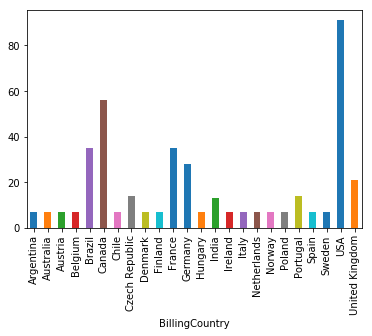

In [9]:
import matplotlib.pyplot as plt
countries.plot(kind='bar', x='BillingCountry', y='Count', legend=None)

8. Mostre a soma total do valor das notas fiscals (**invoices**) por país (**BillingCountry**).

In [36]:
stmt = select([invoices.columns.BillingCountry
               , func.sum(invoices.columns.Total).label('Sum')])
stmt = stmt.group_by(invoices.columns.BillingCountry)
with engine.connect() as con:
    results   = con.execute(stmt).fetchall()
    summaries = pd.DataFrame(results)
    summaries.columns = results[0].keys()
    
summaries

/Users/luiz/apps/anaconda3/lib/python3.7/site-packages/sqlalchemy/sql/sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


,BillingCountry,Sum
0,Argentina,37.62
1,Australia,37.62
2,Austria,42.62
3,Belgium,37.62
4,Brazil,190.10
5,Canada,303.96
6,Chile,46.62
7,Czech Republic,90.24
8,Denmark,37.62
9,Finland,41.62


9. Plote um gráfico de barras com a soma total do valor das notas fiscals (**invoices**) por país (**BillingCountry**).

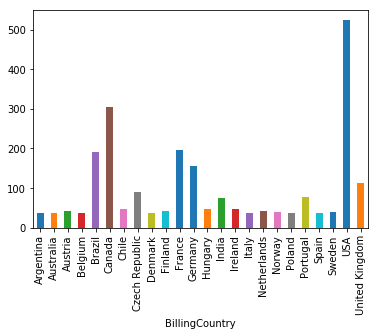

In [37]:
summaries['Sum'] = summaries['Sum'].astype(float)
summaries.plot(kind='bar', x='BillingCountry', y='Sum', legend=None)